In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Function that counts the number of variables (excluding the ID column) and the number of records of a DataFrame

# INPUT:
# df: DataFrame with the data
# OUTPUT:
# n_variables: number of variables of the DataFrame
# n_records: number of records of the DataFrame

def count_variables_records(df):
    columns_to_count = [col for col in df.columns if col != 'ID']
    n_variables = len(columns_to_count)
    n_records = len(df)
    print('Number of variables:', n_variables)
    print('Number of records:', n_records)

# Function that calculates the percentage of missing values of each column of a DataFrame

# INPUT:
# df: DataFrame with the data
# OUTPUT:
# missing_values: DataFrame with the percentage of missing values of each column

def missing_values(df):
    missing_values = pd.DataFrame(df.isnull().sum()/len(df)*100, columns=['% Missing values'])
    missing_values = missing_values.sort_values(by='% Missing values', ascending=False)
    return missing_values

# Function that imputes the missing values of a DataFrame. It excludes the datetime columns from the imputation

# INPUT:
# df: DataFrame with the data
# OUTPUT:
# non_datetime_imputed: DataFrame with the missing values imputed

def impute_missing_values(df):
    pattern = r'^(MH|TRT|SOC)'
    columns_to_impute = df.filter(regex=pattern).columns
    df_to_impute = df[columns_to_impute]
    imputer = IterativeImputer(max_iter=10, random_state=0)
    df_imputed = pd.DataFrame(imputer.fit_transform(df_to_impute), columns=df_to_impute.columns, index=df_to_impute.index)
    df_imputed = df_imputed.round().astype(int)
    df[columns_to_impute] = df_imputed
    return df

In [2]:
# We load the original dataset and seeing that the Age variable does not have null values in the records that interest us, we use it to remove the records that do not have a value in this variable
df = pd.read_excel('BASE_DATOS.xlsx', engine='openpyxl')
print("Original number of records:", len(df))
print("Original number of columns:", len(df.columns))
# We print the list of Id values of the removed records
list_edad = df[df['Edad'].isnull()]['Id'].tolist()
print(list_edad)

df = df.drop(df[df['Edad'].isnull()].index)
print("Number of records after removing null rows:", len(df))

Original number of records: 2478
Original number of columns: 290
[62, 63, 68, 72, 81, 94, 103, 110, 114, 118, 283, 303, 318, 401, 409, 639, 765, 937, 1027, 1064, 1065, 1084, 1164, 1191, 1258, 1291, 1294, 1339, 1357, 1367, 1369, 1370, 1375, 1380, 1381, 1382, 1387, 1388, 1392, 1397, 1404, 1417, 1418, 1419, 1423, 1425, 1433, 1440, 1455, 1464, 1477, 1487, 1500, 1520, 1937, 2203]
Number of records after removing null rows: 2422


In [3]:
# Dates of the procedure

# First day
print("First date of the procedure:", df['Unnamed: 34'].min())
# Last day
print("Last date of the procedure:", df['Unnamed: 34'].max())

First date of the procedure: 2016-06-12 00:00:00
Last date of the procedure: 2020-03-09 00:00:00


In [4]:
# We start by removing some patients that do not provide much information for our analysis focused on social factors

df = df.drop(df[df['Id'] == 51].index)
df = df.drop(df[df['Id'] == 178].index)
df = df.drop(df[df['Id'] == 305].index)
df = df.drop(df[df['Id'] == 306].index)
df = df.drop(df[df['Id'] == 375].index)
df = df.drop(df[df['Id'] == 625].index)
df = df.drop(df[df['Id'] == 733].index)
df = df.drop(df[df['Id'] == 776].index)
df = df.drop(df[df['Id'] == 1288].index)
df = df.drop(df[df['Id'] == 1745].index)
df = df.drop(df[df['Id'] == 1885].index)
df = df.drop(df[df['Id'] == 1886].index)
df = df.drop(df[df['Id'] == 1946].index)
df = df.drop(df[df['Id'] == 1962].index)
df = df.drop(df[df['Id'] == 1966].index)
df = df.drop(df[df['Id'] == 1971].index)
df = df.drop(df[df['Id'] == 668].index)
df = df.drop(df[df['Id'] == 753].index)
df = df.drop(df[df['Id'] == 908].index)

**Initial analyses**

count    2403.000000
mean       66.064087
std        11.705022
min        28.000000
25%        58.000000
50%        66.000000
75%        75.000000
max        93.000000
Name: Edad, dtype: float64


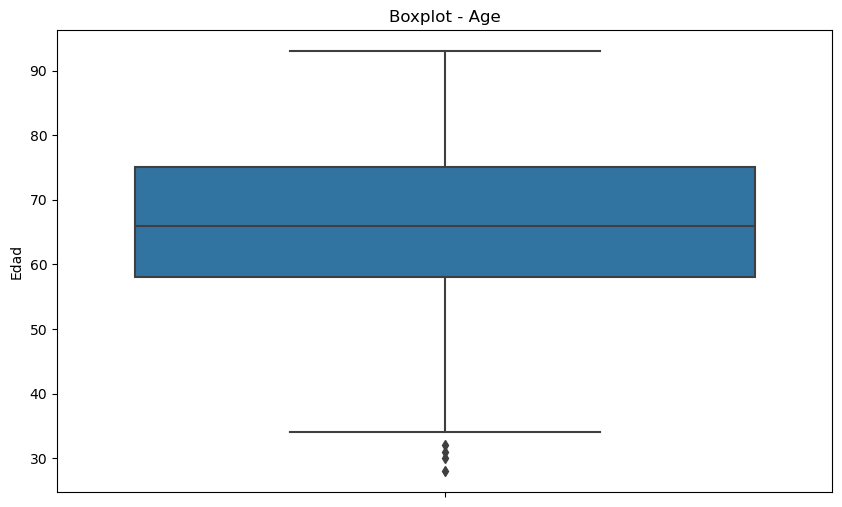

[1136, 1510, 1751, 2113]
count    2399.000000
mean       66.123802
std        11.622794
min        34.000000
25%        58.000000
50%        66.000000
75%        75.000000
max        93.000000
Name: Edad, dtype: float64


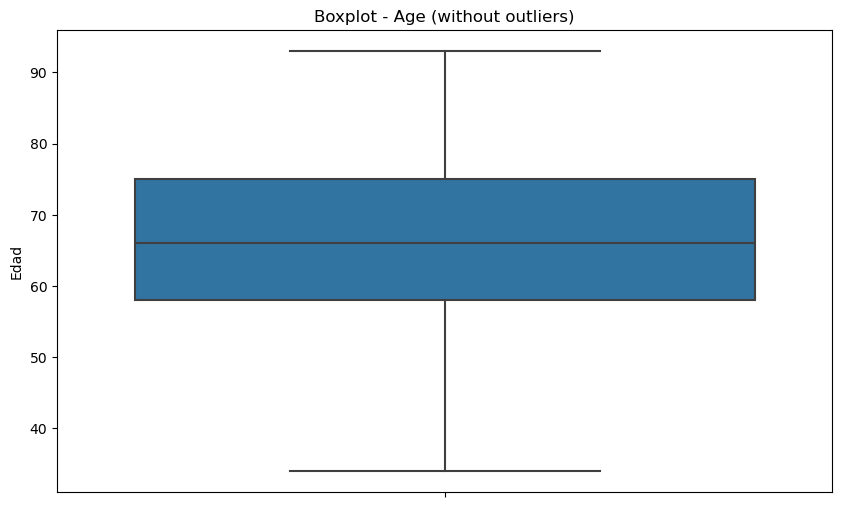

In [5]:
# statistical summary of the Age variable
print(df['Edad'].describe())

# box plot of the Age variable
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Edad'])
plt.title('Boxplot - Age')
plt.show()

Q1 = df['Edad'].quantile(0.25)
Q3 = df['Edad'].quantile(0.75)
IQR = Q3 - Q1
# we calculate the lower and upper bounds
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
# we print the outliers
outliers = df[(df['Edad']<lower_bound)|(df['Edad']>upper_bound)]['Id'].tolist()
print(outliers)
# we remove the outliers
df = df[(df['Edad']>=lower_bound)&(df['Edad']<=upper_bound)]

# we calculate the new statistical summary of the Age variable
print(df['Edad'].describe())

# we plot the new box plot of the Age variable
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Edad'])
plt.title('Boxplot - Age (without outliers)')
plt.show()

In [6]:
# SEX - Sex of the patient

# We check that the Sexo variable does not have null values
print(df['Sexo'].isnull().sum())
# We check the different values of the Sexo variable
print(df['Sexo'].value_counts())

0
Sexo
2.0    1845
1.0     554
Name: count, dtype: int64


In [7]:
# BMI - Body mass index of the patient. First we check the missing values of the variables Peso and Talla

# We assign the value of the variable 'Peso.PSS' to the variable 'Peso' when the latter is null
df['Peso'] = df['Peso'].fillna(df['Peso.PSS'])
# and we assign the value of the variable 'Talla.PSS' to the variable 'Talla' when the latter is null
df['Talla'] = df['Talla'].fillna(df['Talla.PSS'])
# We show the patients with a weight difference greater than 5 to check if there are any outliers
df['diff_weight'] = df.apply(lambda row: row['Id'] if not pd.isnull(row['Peso']) and not pd.isnull(row['Peso.PSS']) and abs(row['Peso'] - row['Peso.PSS']) > 5 else None, axis=1)
# Now we show the patients with a height difference greater than 5 to check if there are any outliers
df['diff_height'] = df.apply(lambda row: row['Id'] if not pd.isnull(row['Talla']) and not pd.isnull(row['Talla.PSS']) and abs(row['Talla'] - row['Talla.PSS']) > 5 else None, axis=1)
ids_diff_weight = df.dropna(subset=['diff_weight'])['Id']
print("IDs with weight difference greater than 5:", ids_diff_weight.tolist())
ids_diff_height = df.dropna(subset=['diff_height'])['Id']
print("IDs with height difference greater than 5:", ids_diff_height.tolist())

IDs with weight difference greater than 5: [865, 965, 1097, 1150, 1229]
IDs with height difference greater than 5: [965, 1097, 1264, 2387]


In [8]:
# We correct some values of the variables

# Patient ID 865:
# We change the value of Weight from 30 to the value of Weight.PSS which is 80
df.loc[df['Id'] == 865, 'Peso'] = 80

# Patient ID 965:
# We exchange the values of Weight and Height(Talla)
df.loc[df['Id'] == 965, 'Peso'] = 90
df.loc[df['Id'] == 965, 'Talla'] = 170

# For the patient with ID 1097, we delete the value of FechaKT.PSS
df.loc[df['Id'] == 1097, 'FechaKT.PSS'] = None
# and we shift the values from Peso.PSS to UsaSkype one value to the right
shifted_values = df.loc[df['Id'] == 1097, 'Peso.PSS':'UsaSkype'].shift(1, axis=1)
for col in shifted_values.columns:
    df.loc[df['Id'] == 1097, col] = shifted_values[col]

# For the patient with ID 1229 we change the value of Peso.PSS to 62 and the height to 150
df.loc[df['Id'] == 1229, 'Peso.PSS'] = 62
df.loc[df['Id'] == 1229, 'Talla.PSS'] = 150

# For the patient with ID 1264, the criterion chosen is to take the correct height as the average between the columns Talla and Talla.PSS
df.loc[df['Id'] == 1264, 'Talla'] = (df.loc[df['Id'] == 1264, 'Talla'] + df.loc[df['Id'] == 1264, 'Talla.PSS'])/2

# For the patient 2387, the height is 195
df.loc[df['Id'] == 2387, 'Talla'] = 195

C:\Users\juanm\AppData\Local\Temp\ipykernel_18004\2685960435.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Id'] == 1097, col] = shifted_values[col]
C:\Users\juanm\AppData\Local\Temp\ipykernel_18004\2685960435.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Id'] == 1097, col] = shifted_values[col]
C:\Users\juanm\AppData\Local\Temp\ipykernel_18004\2685960435.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[nan]' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.loc[df['Id'] == 1097, col] = shifted

In [9]:
# FHxIHD - Family history of ischemic heart disease 

# We check that the HFdeC.isquemica variable does not have null values
print(df['HFdeC.isquemica'].isnull().sum())
# We recategorize the values of the HFdeC.isquemica variable
df['HFdeC.isquemica'] = df['HFdeC.isquemica'].replace({1: 0, 2: 1})
# We check the different values of the HFdeC.isquemica variable
print(df['HFdeC.isquemica'].value_counts())

0
HFdeC.isquemica
0.0    1452
1.0     947
Name: count, dtype: int64


In [10]:
# SMK - Smoking status of the patient

# We check if the Fumador variable has null values
print(df['Fumador'].isnull().sum())
# We check the different values of the Fumador variable
print(df['Fumador'].value_counts())

7
Fumador
2.0    1095
3.0     650
1.0     647
Name: count, dtype: int64


In [11]:
# DM - Diabetes mellitus of the patient

# We check if the Diabetes variable has null values
print(df['Diabetes'].isnull().sum())
# We recategorize the values of the Diabetes variable
df['Diabetes'] = df['Diabetes'].replace({1: 0, 2: 1})
# We correct some values of the variable with the information provided by the expert
df.loc[df['Id'] == 763, 'Diabetes'] = 1
df.loc[df['Id'] == 1099, 'Diabetes'] = 1
df.loc[df['Id'] == 1172, 'Diabetes'] = 0
df.loc[df['Id'] == 1546, 'Diabetes'] = 1
df.loc[df['Id'] == 1602, 'Diabetes'] = 0
df.loc[df['Id'] == 1740, 'Diabetes'] = 1
# We check the different values of the Diabetes variable
print(df['Diabetes'].value_counts())

3
Diabetes
0.0    1690
1.0     707
Name: count, dtype: int64


In [12]:
# HTN - Hypertension

# We check if the Hipertension variable has null values
print(df['Hipertension'].isnull().sum())
# We recategorize the values of the Hipertension variable
df['Hipertension'] = df['Hipertension'].replace({1: 0, 2: 1})
# We check the different values of the Hipertension variable
print(df['Hipertension'].value_counts())

4
Hipertension
1.0    1590
0.0     805
Name: count, dtype: int64


In [13]:
# DLP - Dyslipidemia

# We check if the Dislipemia variable has null values
print(df['Dislipemia'].isnull().sum())
# We recategorize the values of the Dislipemia variable
df['Dislipemia'] = df['Dislipemia'].replace({1: 0, 2: 1})
# We check the different values of the Dislipemia variable
print(df['Dislipemia'].value_counts())

10
Dislipemia
1.0    1480
0.0     909
Name: count, dtype: int64


In [14]:
# CKD - Chronic kidney disease

# We check that the variable IRC does not have null values
print(df['IRC'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_irc = df[df['IRC'].isnull()]['Id'].tolist()
print(list_irc)
# We recategorize the values of the IRC variable
df['IRC'] = df['IRC'].replace({1: 0, 2: 1})
# We check the different values of the IRC variable
print(df['IRC'].value_counts())

14
[13, 45, 46, 53, 80, 90, 320, 420, 457, 488, 539, 542, 580, 1841]
IRC
0.0    2106
1.0     279
Name: count, dtype: int64


In [15]:
# HMG - Hemoglobin

# We categorize the variable into 2 categories. 1 for normal levels and 2 for non-normal levels.
# If Sexo is 1, the patient is a woman and normal hemoglobin levels are between 12.1 and 15.1 g/dL
# If Sexo is 2, the patient is a man and normal hemoglobin levels are between 13.8 and 17.2 g/dL
df['MH_HGB'] = 2
# We update the values for females (Sexo = 1) and normal hemoglobin levels
df.loc[(df['Sexo'] == 1) & (df['HBpreKT'] >= 12.1) & (df['HBpreKT'] <= 15.1), 'MH_HGB'] = 1
# We update the values for males (Sexo = 2) and normal hemoglobin levels
df.loc[(df['Sexo'] == 2) & (df['HBpreKT'] >= 13.8) & (df['HBpreKT'] <= 17.2), 'MH_HGB'] = 1
# We check the different values of the MH_HGB variable
print(df['MH_HGB'].value_counts())

MH_HGB
1    1572
2     827
Name: count, dtype: int64


In [16]:
# PMxMI - Previous myocardial infarction

# We check that the InfartoAntiguo variable does not have null values
print(df['InfartoAntiguo'].isnull().sum())
# We recategorize the values of the InfartoAntiguo variable
df['InfartoAntiguo'] = df['InfartoAntiguo'].replace({1: 0, 2: 1})
# We check the different values of the InfartoAntiguo variable
print(df['InfartoAntiguo'].value_counts())

3
InfartoAntiguo
0.0    1934
1.0     462
Name: count, dtype: int64


In [17]:
# PMxPCI - Previous PCI (Perctuaneus Coronary Intervention)

# We check if the ACTPprevia variable has null values
print(df['ACTPprevia'].isnull().sum())
# We recategorize the values of the ACTPprevia variable
df['ACTPprevia'] = df['ACTPprevia'].replace({1: 0, 2: 1})
# We check the different values of the ACTPprevia variable
print(df['ACTPprevia'].value_counts())

7
ACTPprevia
0.0    1734
1.0     658
Name: count, dtype: int64


In [18]:
# PAD - Peripheral Arterial Disease

# We check if the EnfArtPerif.pre variable has null values
print(df['EnfArtPerif.pre'].isnull().sum())
# We recategorize the values of the EnfArtPerif.pre variable
df['EnfArtPerif.pre'] = df['EnfArtPerif.pre'].replace({1: 0, 2: 1})
# We check the different values of the EnfArtPerif.pre variable
print(df['EnfArtPerif.pre'].value_counts())

19
EnfArtPerif.pre
0.0    2136
1.0     244
Name: count, dtype: int64


In [19]:
# STK - Stroke

# If ACVpre is 1 it means that the patient hasnt had a stroke, if it is a value different from 1 it means that the patient has had a stroke (not null)
df['ACVpre'] = np.where(df['ACVpre'] == 1, 0, np.where(pd.notna(df['ACVpre']), 1, df['ACVpre']))
# We check the different values of the ACVpre variable
print(df['ACVpre'].value_counts())

ACVpre
0.0    2226
1.0     138
Name: count, dtype: int64


**MEDICAL HISTORY (MH)**

In [20]:
# We define a DataFrame with the medical history variables. We put "MH_" as a prefix to the variables to indicate that they are background variables.
df_bg = df[['Id', 'Edad', 'Sexo', 'Peso', 'Talla', 'HFdeC.isquemica', 'Fumador', 'Diabetes', 'Hipertension', 'Dislipemia', 'IRC', 'MH_HGB', 'InfartoAntiguo', 'ACTPprevia', 'EnfArtPerif.pre', 'ACVpre']]
df_bg = df_bg.rename(columns={
    'Id': 'ID',
    'Edad': 'MH_AGE',
    'Sexo': 'MH_SEX',
    'Peso': 'MH_WGT',
    'Talla': 'MH_HT',
    'HFdeC.isquemica': 'MH_FHxIHD',
    'Fumador': 'MH_SMK',
    'Diabetes': 'MH_DM',
    'Hipertension': 'MH_HTN',
    'Dislipemia': 'MH_DLP',
    'IRC': 'MH_CKD',
    'MH_HMG': 'MH_HMG',
    'InfartoAntiguo': 'MH_PMxMI',
    'ACTPprevia': 'MH_PMxPCI',
    'EnfArtPerif.pre': 'MH_PAD',
    'ACVpre': 'MH_STK'
})

# We discretize the Age variable into three categories
terciles = df_bg['MH_AGE'].quantile([0.33, 0.66])
df_bg['MH_AGE'] = pd.cut(df_bg['MH_AGE'], bins=[df_bg['MH_AGE'].min()-1, terciles.iloc[0], terciles.iloc[1], df_bg['MH_AGE'].max()], labels=[1, 2, 3])

# We calculate the BMI variable
df_bg['MH_BMI'] = df_bg['MH_WGT'] / (df_bg['MH_HT'] / 100) ** 2
bins = [0, 18.5, 25, 30, np.inf]
labels = [1, 2, 3, 4]
df_bg['MH_BMI'] = pd.cut(df_bg['MH_BMI'], bins=bins, labels=labels)

# We drop the variables that are not needed
df_bg.drop('MH_WGT', axis=1, inplace=True)
df_bg.drop('MH_HT', axis=1, inplace=True)

# We count the number of variables and records of the DataFrame
count_variables_records(df_bg)

# We check the percentage of missing values of the DataFrame
print(missing_values(df_bg))

# We check the first 5 records of the DataFrame
print(df_bg.head())

# We save the DataFrame with the background variables in a csv file
df_bg.to_csv('MH_DATA.csv', index=False)

Number of variables: 14
Number of records: 2399
           % Missing values
MH_BMI             3.209671
MH_STK             1.458941
MH_PAD             0.791997
MH_CKD             0.583576
MH_DLP             0.416840
MH_SMK             0.291788
MH_PMxPCI          0.291788
MH_HTN             0.166736
MH_PMxMI           0.125052
MH_DM              0.083368
ID                 0.000000
MH_AGE             0.000000
MH_SEX             0.000000
MH_FHxIHD          0.000000
MH_HGB             0.000000
   ID MH_AGE  MH_SEX  MH_FHxIHD  MH_SMK  MH_DM  MH_HTN  MH_DLP  MH_CKD  \
0   1      1     2.0        0.0     1.0    0.0     1.0     1.0     0.0   
1   2      3     2.0        0.0     3.0    0.0     1.0     0.0     0.0   
2   3      1     2.0        0.0     1.0    0.0     0.0     0.0     0.0   
3   4      2     1.0        1.0     3.0    0.0     0.0     1.0     0.0   
4   5      2     2.0        0.0     2.0    1.0     1.0     1.0     0.0   

   MH_HGB  MH_PMxMI  MH_PMxPCI  MH_PAD  MH_STK MH_BMI  
0  

In [21]:
# IND - Indications (for procedures)

# We check if there are null values in the variable Indicaciones
print(df['Indicacion'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_indicaciones = df[df['Indicacion'].isnull()]['Id'].tolist()
print(list_indicaciones)
indicacion_mapping = {1.0: 1, 4.0: 2}
df['Indicacion'] = df['Indicacion'].map(lambda x: indicacion_mapping.get(x, 3))
# We check the different values of the Indicaciones variable
print(df['Indicacion'].value_counts())

3
[347, 750, 1473]
Indicacion
3    1074
2     666
1     659
Name: count, dtype: int64


In [22]:
# ACC - Access (type of access for treatment)

# We check if there are null values in the variable Acceso
print(df['Acceso'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_acceso = df[df['Acceso'].isnull()]['Id'].tolist()
print(list_acceso)
# We check the different values of the Acceso variable
print(df['Acceso'].value_counts())

29
[38, 172, 272, 273, 408, 454, 466, 524, 534, 549, 570, 763, 842, 971, 978, 989, 1044, 1121, 1127, 1189, 1233, 1332, 1429, 1484, 1573, 1718, 2227, 2243, 2338]
Acceso
1.0    1271
2.0    1099
Name: count, dtype: int64


In [23]:
# LCA - Left coronary artery

# We check if there are null values in the variable TCI
print(df['TCI.Actual'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_tci = df[df['TCI.Actual'].isnull()]['Id'].tolist()
print(list_tci)
# We check the different values of the TCI variable
print(df['TCI.Actual'].value_counts())

0
[]
TCI.Actual
0    2142
1     257
Name: count, dtype: int64


In [24]:
# LAD - Left anterior descending artery

# We check if there are null values in the variable DA
print(df['DA.Actual'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_da = df[df['DA.Actual'].isnull()]['Id'].tolist()
print(list_da)
# We check the different values of the DA variable
print(df['DA.Actual'].value_counts())

0
[]
DA.Actual
1    1424
0     975
Name: count, dtype: int64


In [25]:
# LCX - Left circumflex artery

# We check if there are null values in the variable Cx
print(df['CX.Actual'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_cx = df[df['CX.Actual'].isnull()]['Id'].tolist()
print(list_cx)
# We check the different values of the Cx variable
print(df['CX.Actual'].value_counts())

0
[]
CX.Actual
0    1468
1     931
Name: count, dtype: int64


In [26]:
# RCA - Right coronary artery

# We check if there are null values in the variable CD
print(df['CD.Actual'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_cd = df[df['CD.Actual'].isnull()]['Id'].tolist()
print(list_cd)
# We check the different values of the CD variable
print(df['CD.Actual'].value_counts())

0
[]
CD.Actual
1    1207
0    1192
Name: count, dtype: int64


In [27]:
# DEC_TRMT - Decision for treatment

# We check if there are null values in the variable TratDecidido
print(df['TratDecidido'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_tratdecidido = df[df['TratDecidido'].isnull()]['Id'].tolist()
print(list_tratdecidido)
# We check the different values of the TratDecidido variable
print(df['TratDecidido'].value_counts())

2
[1769, 2175]
TratDecidido
1.0    1828
3.0     437
2.0     132
Name: count, dtype: int64


In [28]:
# EF - Ejection fraction

# We check if there are null values in the variable FE
print(df['FE'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_fe = df[df['FE'].isnull()]['Id'].tolist()
print(list_fe)

106
[196, 230, 253, 261, 285, 299, 381, 385, 388, 429, 462, 474, 557, 563, 583, 586, 606, 610, 617, 633, 652, 657, 699, 732, 758, 763, 768, 775, 835, 837, 839, 843, 844, 847, 849, 850, 852, 890, 909, 946, 948, 949, 967, 981, 997, 1003, 1023, 1026, 1037, 1051, 1054, 1089, 1102, 1106, 1124, 1129, 1162, 1167, 1212, 1222, 1235, 1306, 1386, 1413, 1461, 1471, 1521, 1581, 1601, 1639, 1641, 1646, 1654, 1675, 1710, 1768, 1777, 1778, 1785, 1788, 1792, 1803, 1831, 1838, 1848, 1859, 1866, 1874, 1884, 1927, 1951, 1970, 2009, 2040, 2042, 2094, 2123, 2141, 2156, 2167, 2202, 2223, 2308, 2371, 2385, 2442]


**Treatment (TRT)**

In [29]:
# We define a DataFrame with the treatment variables. We put "TRT_" as a prefix to the variables to indicate that they are treatment variables.
df_trt = df[['Id', 'Indicacion', 'Acceso', 'TCI.Actual', 'DA.Actual', 'CX.Actual', 'CD.Actual', 'TratDecidido', 'FE']]
df_trt = df_trt.rename(columns={
    'Id': 'ID',
    'Indicacion': 'TRT_IND',
    'Acceso': 'TRT_ACC',
    'TCI.Actual': 'TRT_LCA',
    'DA.Actual': 'TRT_LAD',
    'CX.Actual': 'TRT_LCX',
    'CD.Actual': 'TRT_RCA',
    'TratDecidido': 'TRT_DEC',
    'FE': 'TRT_EF'
})
                                    
# If FE is between 50-70 we assign 0 Good, if it is not in the interval 1 Bad
df_trt.loc[:, 'TRT_EF'] = df_trt['TRT_EF'].apply(lambda x: 0 if 50 <= x <= 70 else 1)

# We count the number of variables and records of the DataFrame
count_variables_records(df_trt)

# We check the percentage of missing values of the DataFrame
print(missing_values(df_trt))

# We check the first 5 records of the DataFrame
print(df_trt.head())

# We save the DataFrame with the treatment variables in a csv file
df_trt.to_csv('TRT_DATA.csv', index=False)

Number of variables: 8
Number of records: 2399
         % Missing values
TRT_ACC          1.208837
TRT_DEC          0.083368
ID               0.000000
TRT_IND          0.000000
TRT_LCA          0.000000
TRT_LAD          0.000000
TRT_LCX          0.000000
TRT_RCA          0.000000
TRT_EF           0.000000
   ID  TRT_IND  TRT_ACC  TRT_LCA  TRT_LAD  TRT_LCX  TRT_RCA  TRT_DEC  TRT_EF
0   1        2      1.0        0        1        1        1      1.0     1.0
1   2        2      1.0        0        1        0        0      1.0     1.0
2   3        2      2.0        0        0        0        1      1.0     1.0
3   4        2      1.0        0        0        1        0      1.0     1.0
4   5        1      2.0        1        1        1        1      1.0     1.0


In [30]:
# MAR_ST - Marital status

# We check if there are null values in the variable EstadoCivil
print(df['EstadoCivil'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_estadocivil = df[df['EstadoCivil'].isnull()]['Id'].tolist()
print(list_estadocivil)
# We check the different values of the EstadoCivil variable
print(df['EstadoCivil'].value_counts())

1
[2024]
EstadoCivil
2.0    1689
4.0     257
3.0     238
1.0     214
Name: count, dtype: int64


In [30]:
# LIV_ALN - Lives alone

# We check if there are null values in the variable ConQuienVive.PSS
print(df['ConQuienVive.PSS'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_conquienvive = df[df['ConQuienVive.PSS'].isnull()]['Id'].tolist()
print(list_conquienvive)
# We check the different values of the ConQuienVive.PSS variable
print(df['ConQuienVive.PSS'].value_counts())

8
[54, 56, 701, 803, 1006, 1416, 1595, 2024]
ConQuienVive.PSS
2.0    2033
1.0     338
4.0      16
3.0       4
Name: count, dtype: int64


In [31]:
# SUPP - Family support

# We check if there are null values in the variable ApoyoFamiliar
print(df['ApoyoFamiliar'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_apoyofamiliar = df[df['ApoyoFamiliar'].isnull()]['Id'].tolist()
print(list_apoyofamiliar)
# We recategorize the values of the ApoyoFamiliar variable
df['ApoyoFamiliar'] = df['ApoyoFamiliar'].replace({1: 0, 2: 1})
# We check the different values of the ApoyoFamiliar variable
print(df['ApoyoFamiliar'].value_counts())

16
[54, 56, 801, 930, 933, 946, 947, 986, 1071, 1126, 1138, 1228, 1238, 1256, 1595, 2024]
ApoyoFamiliar
1.0    2322
0.0      61
Name: count, dtype: int64


In [32]:
# ACT_EMP - Active employment

# We check if there are null values in the variable Ocupacion.PSS
print(df['Ocupacion.PSS'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_ocupacion = df[df['Ocupacion.PSS'].isnull()]['Id'].tolist()
print(list_ocupacion)
# We check the different values of the Ocupacion.PSS variable
print(df['Ocupacion.PSS'].value_counts())

1
[2024]
Ocupacion.PSS
4.0    1614
2.0     651
3.0     133
Name: count, dtype: int64


In [33]:
# WOR_TYPE - Work type

# We check if there are null values in the variable TipoTrabajo.PSS
print(df['TipoTrabajo.PSS'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_tipotrabajo = df[df['TipoTrabajo.PSS'].isnull()]['Id'].tolist()
print(list_tipotrabajo)
# We check the different values of the TipoTrabajo.PSS variable
print(df['TipoTrabajo.PSS'].value_counts())

5
[1082, 1378, 1818, 2024, 2341]
TipoTrabajo.PSS
2.0    1655
1.0     739
Name: count, dtype: int64


In [34]:
# EX - Exercise

# We check if there are null values in the variable Ejercicio.PSS
print(df['Ejercicio.PSS'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_ejercicio = df[df['Ejercicio.PSS'].isnull()]['Id'].tolist()
print(list_ejercicio)
# We recategorize the values of the Ejercicio.PSS variable
df['Ejercicio.PSS'] = df['Ejercicio.PSS'].replace({1: 0, 2: 1})
# We check the different values of the Ejercicio.PSS variable
print(df['Ejercicio.PSS'].value_counts())

5
[23, 25, 151, 233, 651]
Ejercicio.PSS
1.0    1544
0.0     850
Name: count, dtype: int64


In [35]:
# SALT_DIET - Preference for salty foods

# We check if there are null values in the variable SosoSalado.PSS
print(df['SosoSalado.PSS'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_sososalado = df[df['SosoSalado.PSS'].isnull()]['Id'].tolist()
print(list_sososalado)
# We check the different values of the SosoSalado.PSS variable
print(df['SosoSalado.PSS'].value_counts())

5
[23, 25, 797, 929, 1379]
SosoSalado.PSS
1.0    1256
2.0    1138
Name: count, dtype: int64


In [36]:
# ALC - Alcohol consumption

# We check if there are null values in the variable Alcohol.PSS
print(df['Alcohol.PSS'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_alcohol = df[df['Alcohol.PSS'].isnull()]['Id'].tolist()
print(list_alcohol)
# We check the different values of the Alcohol.PSS variable
print(df['Alcohol.PSS'].value_counts())

3
[23, 25, 2062]
Alcohol.PSS
1.0    1221
3.0     869
2.0     306
Name: count, dtype: int64


In [37]:
# MOB_PH - Mobile phone use

# We check if there are null values in the variable TelefMovil.PSS
print(df['TelefMovil.PSS'].isnull().sum())
# We print the list of Id values of the records that do not have a value in this variable
list_telefmovil = df[df['TelefMovil.PSS'].isnull()]['Id'].tolist()
print(list_telefmovil)
# We check the different values of the TelefMovil.PSS variable
print(df['TelefMovil.PSS'].value_counts())

3
[1028, 1654, 2024]
TelefMovil.PSS
2.0    1408
3.0     726
1.0     262
Name: count, dtype: int64


**SOCIAL ASPECTS (SOC)**

In [38]:
# We define a DataFrame with the background variables. We put "SOC_" as a prefix to the variables to indicate that they are background variables.
df_soc = df[['Id', 'EstadoCivil', 'ConQuienVive.PSS', 'ApoyoFamiliar', 'LugarResidencia.PSS', 'NivelEstudios.PSS', 'Ocupacion.PSS', 'TipoTrabajo.PSS', 'Ejercicio.PSS', 'SosoSalado.PSS', 'Alcohol.PSS', 'Facebook.PSS', 'Twitter.PSS', 'Youtube.PSS', 'LinkeDin.PSS', 'Spotify.PSS', 'OtrasRedes.PSS', 'TelefMovil.PSS', 'FrecOlvidoTrat.PSS']]

df_soc = df_soc.rename(columns={
    'Id': 'ID',
    'EstadoCivil': 'SOC_MAR_ST',
    'ConQuienVive.PSS': 'SOC_LIV_ALN',
    'ApoyoFamiliar': 'SOC_SUPP',
    'LugarResidencia.PSS': 'SOC_RES',
    'NivelEstudios.PSS': 'SOC_EDU',
    'Ocupacion.PSS': 'SOC_ACT_EMP',
    'TipoTrabajo.PSS': 'SOC_WOR_TYPE',
    'Ejercicio.PSS': 'SOC_EX',
    'SosoSalado.PSS': 'SOC_SALT_DIET',
    'Alcohol.PSS': 'SOC_ALC',
    'Facebook.PSS': 'Facebook.PSS',
    'Twitter.PSS': 'Twitter.PSS',
    'Youtube.PSS': 'Youtube.PSS',
    'LinkeDin.PSS': 'LinkeDin.PSS',
    'Spotify.PSS': 'Spotify.PSS',
    'OtrasRedes.PSS': 'OtrasRedes.PSS',
    'TelefMovil.PSS': 'SOC_MOB_PH',
    'FrecOlvidoTrat.PSS': 'SOC_A_TRT'
})

# If SOC_MAR_ST is 2 we put 1, if it is 1, 3 or 4 we put 2
df_soc.loc[:, 'SOC_MAR_ST'] = df_soc['SOC_MAR_ST'].apply(lambda x: 1 if x == 2 else 2)

# If ConQuienVive.PSS is 2, 3 or 4, LIV_ALN is 1, otherwise LIV_ALN is 2
df_soc.loc[:, 'SOC_LIV_ALN'] = df_soc['SOC_LIV_ALN'].apply(lambda x: 1 if x in [2, 3, 4] else 2)

# If SOC_EDU is 1 we put 0, if it is 2, 3 or 4 we put 1
df_soc.loc[:, 'SOC_EDU'] = df_soc['SOC_EDU'].apply(lambda x: 0 if x == 1 else 1)

# If Ocupacion.PSS is 3 or 4, SOC_ACT_EMP is 1, if it is 1 or 2, SOC_ACT_EMP is 2
df_soc.loc[:, 'SOC_ACT_EMP'] = df_soc['SOC_ACT_EMP'].apply(lambda x: 1 if x in [3, 4] else 2)

# If Facebook.PSS, Twitter.PSS, Youtube.PSS, LinkeDin.PSS, Spotify.PSS is 1, or there is a non-NaN value in OtrasRedes.PSS, SOC_SOC_MED is 1, 0 otherwise
df_soc.loc[:, 'SOC_SOC_MED'] = df_soc[['Facebook.PSS', 'Twitter.PSS', 'Youtube.PSS', 'LinkeDin.PSS', 'Spotify.PSS', 'OtrasRedes.PSS']].apply(lambda x: 1 if 1 in x.values or x['OtrasRedes.PSS'] == 1 else 0, axis=1)

# If TelefMovil.PSS is 1, SOC_MOB_PH is 1, if it is 2 or 3, SOC_MOB_PH is 2
df_soc.loc[:, 'SOC_MOB_PH'] = df_soc['SOC_MOB_PH'].apply(lambda x: 0 if x == 1 else 1)

# We drop the variables Facebook.PSS, Twitter.PSS, Youtube.PSS, LinkeDin.PSS, Spotify.PSS and OtrasRedes.PSS
df_soc.drop(['Facebook.PSS', 'Twitter.PSS', 'Youtube.PSS', 'LinkeDin.PSS', 'Spotify.PSS', 'OtrasRedes.PSS'], axis=1, inplace=True)

# If FrecOlvidoTrat.PSS is 1 ,2 or 3, TRT_A_TRMT is 1, 0 otherwise
df_soc.loc[:, 'SOC_A_TRT'] = df_soc['SOC_A_TRT'].apply(lambda x: 1 if x in [1, 2, 3] else 0)

# We count the number of variables and records of the DataFrame
count_variables_records(df_soc)

# We check the percentage of missing values of the DataFrame
print(missing_values(df_soc))

# We check the first 5 records of the DataFrame
print(df_soc.head())

# We save the DataFrame with the social variables in a csv file
df_soc.to_csv('SOC_DATA.csv', index=False)

Number of variables: 13
Number of records: 2399
               % Missing values
SOC_SUPP               0.666945
SOC_WOR_TYPE           0.208420
SOC_EX                 0.208420
SOC_SALT_DIET          0.208420
SOC_ALC                0.125052
SOC_RES                0.041684
ID                     0.000000
SOC_MAR_ST             0.000000
SOC_LIV_ALN            0.000000
SOC_EDU                0.000000
SOC_ACT_EMP            0.000000
SOC_MOB_PH             0.000000
SOC_A_TRT              0.000000
SOC_SOC_MED            0.000000
   ID  SOC_MAR_ST  SOC_LIV_ALN  SOC_SUPP  SOC_RES SOC_EDU  SOC_ACT_EMP  \
0   1         1.0          1.0       1.0      1.0       1          2.0   
1   2         1.0          1.0       1.0      1.0       1          1.0   
2   3         2.0          1.0       1.0      1.0       1          2.0   
3   4         1.0          1.0       1.0      1.0       1          1.0   
4   5         1.0          2.0       1.0      1.0       1          1.0   

   SOC_WOR_TYPE  SOC_EX SOC

In [39]:
# We compare the columns Unnamed: 34 and Fecha entrada and we show the IDs for which the dates are different
df['Unnamed: 34'] = pd.to_datetime(df['Unnamed: 34'], errors='coerce')
df['Fecha entrada'] = pd.to_datetime(df['Fecha entrada'], errors='coerce')
df['diff_dates'] = df.apply(lambda row: row['Id'] if row['Unnamed: 34'] != row['Fecha entrada'] else None, axis=1)
ids_diff_dates = df.dropna(subset=['diff_dates'])['Id']
print("IDs with different dates:", ids_diff_dates.tolist())

IDs with different dates: []


In [40]:
# DATE_PROC - Date of the procedure

# We check if there are null values in the variable Fecha
print(df['Unnamed: 34'].isnull().sum())
# We save in a list the Id values of the records that do not have a value in this variable
list_fecha = df[df['Unnamed: 34'].isnull()]['Id'].tolist()
print(list_fecha)

# For the id 102 we change to 2018-04-02
df.loc[df['Id'] == 102, 'Unnamed: 34'] = '2018-04-02'

0
[]


In [41]:
# En Fecha muerte pongo el valor de Fecha muerte CV para los pacientes con Id 102
df.loc[df['Id'] == 102, 'Fecha muerte'] = df.loc[df['Id'] == 102, 'Fecha muerte CV']
# En fecha muerte pongo el valor de '2019-04-16' para el paciente con Id 205
df.loc[df['Id'] == 205, 'Fecha muerte'] = '2019-04-16'
# En Fecha IAM pongo el valor de '2019-01-23' para el paciente con Id 317
df.loc[df['Id'] == 317, 'Fecha IAM'] = '2019-01-23'
# En Fecha IAM pongo el valor de '2018-08-28' para el paciente con Id 400
df.loc[df['Id'] == 400, 'Fecha IAM'] = '2018-08-28'
# En Fecha IAM pongo el valor de NaN para el paciente con Id 407
df.loc[df['Id'] == 407, 'Fecha IAM'] = np.nan
# En Fecha IAM pongo el valor de NaN para el paciente con Id 408
df.loc[df['Id'] == 408, 'Fecha IAM'] = np.nan
# En fecha muerte pongo el valor de '2020-01-19' para el paciente con Id 594
df.loc[df['Id'] == 594, 'Fecha muerte'] = '2020-01-19'
# En fecha muerte pongo el valor de '2016-08-25' para el paciente con Id 957
df.loc[df['Id'] == 957, 'Fecha muerte'] = '2016-08-25'
# En fecha muerte pongo el valor de '2020-11-14' para el paciente con Id 1083
df.loc[df['Id'] == 1083, 'Fecha muerte'] = '2020-11-14'
# En fecha muerte pongo el valor de '2018-03-08' para el paciente con Id 1192
df.loc[df['Id'] == 1192, 'Fecha muerte'] = '2018-03-08'
# En fecha muerte pongo el valor de '2017-02-25' para el paciente con Id 1225
df.loc[df['Id'] == 1225, 'Fecha muerte'] = '2017-02-25'
# En fecha muerte pongo el valor de '2017-06-15' para el paciente con Id 1317
df.loc[df['Id'] == 1317, 'Fecha muerte'] = '2017-06-15'
# En fecha muerte pongo el valor de '2021-05-09' para el paciente con Id 1352
df.loc[df['Id'] == 1352, 'Fecha muerte'] = '2021-05-09'
# En fecha muerte pongo el valor de '2017-05-17' para el paciente con Id 1383
df.loc[df['Id'] == 1383, 'Fecha muerte'] = '2017-05-17'
# En fecha muerte pongo el valor de '2017-09-29' para el paciente con Id 1398
df.loc[df['Id'] == 1398, 'Fecha muerte'] = '2017-09-29'
# En fecha muerte pongo el valor de '2018-08-14' para el paciente con Id 1459
df.loc[df['Id'] == 1459, 'Fecha muerte'] = '2018-08-14'
# En fecha muerte pongo el valor de '2018-03-24' para el paciente con Id 1461
df.loc[df['Id'] == 1461, 'Fecha muerte'] = '2020-03-24'
# En fecha muerte pongo el valor de '2017-07-13' para el paciente con Id 1462
df.loc[df['Id'] == 1462, 'Fecha muerte'] = '2017-07-13'
# En fecha muerte pongo el valor de '2017-05-10' para el paciente con Id 1466
df.loc[df['Id'] == 1466, 'Fecha muerte'] = '2017-05-10'
# En Fecha IAM pongo el valor de '2021-07-29' para el paciente con Id 1503
df.loc[df['Id'] == 1503, 'Fecha IAM'] = '2021-07-29'
# En Fecha IAM pongo el valor de '2020-04-15' para el paciente con Id 1509
df.loc[df['Id'] == 1509, 'Fecha IAM'] = '2020-04-15'
# En Fecha IAM pongo el valor de '2021-07-21' para el paciente con Id 1515
df.loc[df['Id'] == 1515, 'Fecha IAM'] = '2021-07-21'
# En Fecha IAM pongo el valor de '2021-01-24' para el paciente con Id 1562
df.loc[df['Id'] == 1562, 'Fecha IAM'] = '2021-01-24'
# En Fecha IAM pongo el valor de '2020-02-05' para el paciente con Id 1568
df.loc[df['Id'] == 1568, 'Fecha IAM'] = '2020-02-05'
# En fecha muerte pongo el valor de '2021-06-03' para el paciente con Id 1570
df.loc[df['Id'] == 1570, 'Fecha muerte'] = '2021-06-03'
# En fecha muerte pongo el valor de '2021-03-09' para el paciente con Id 1573
df.loc[df['Id'] == 1573, 'Fecha muerte'] = '2021-03-09'
# En fecha muerte pongo el valor de '2018-10-14' para el paciente con Id 1579
df.loc[df['Id'] == 1579, 'Fecha muerte'] = '2018-10-14'
# En fecha muerte pongo el valor de '2020-09-20' para el paciente con Id 1592
df.loc[df['Id'] == 1592, 'Fecha muerte'] = '2020-09-20'
# En Fecha IAM pongo el valor de '2018-08-25' para el paciente con Id 2330
df.loc[df['Id'] == 2330, 'Fecha IAM'] = '2018-08-25'
# En Fecha IAM pongo el valor de '2021-11-09' para el paciente con Id 2334
df.loc[df['Id'] == 2334, 'Fecha IAM'] = '2021-11-09'
# En Fecha IAM pongo el valor de '2021-11-16' para el paciente con Id 2453
df.loc[df['Id'] == 2453, 'Fecha IAM'] = '2021-11-16'
# En Fecha IAM pongo el valor de '2018-04-25' para el paciente con Id 2457
df.loc[df['Id'] == 2457, 'Fecha IAM'] = '2018-04-25'

In [42]:
# For the patient with ID 3 we put a 1 in IAM
df.loc[df['Id'] == 3, 'IAM'] = 1
# For the patient with ID 317 we put a 1 in CausaMuerte
df.loc[df['Id'] == 317, 'CausaMuerte'] = 1
# For the patient with ID 327 we put a 1 in CausaMuerte
df.loc[df['Id'] == 327, 'CausaMuerte'] = 1
# For the patient with ID 363 we put a 1 in CausaMuerte
df.loc[df['Id'] == 363, 'CausaMuerte'] = 1
# For the patient with ID 449 we put a 1 in CausaMuerte
df.loc[df['Id'] == 449, 'CausaMuerte'] = 1
# For the patient with ID 459 we put a 2 in CausaMuerte
df.loc[df['Id'] == 459, 'CausaMuerte'] = 2
# For the patient with ID 474 we put a 2 in CausaMuerte
df.loc[df['Id'] == 474, 'CausaMuerte'] = 2
# For the patient with ID 534 we put a 2 in CausaMuerte
df.loc[df['Id'] == 534, 'CausaMuerte'] = 2
# For the patient with ID 547 we put a 2 in CausaMuerte
df.loc[df['Id'] == 547, 'CausaMuerte'] = 2
# For the patient with ID 550 we put a 2 in CausaMuerte
df.loc[df['Id'] == 550, 'CausaMuerte'] = 2
# For the patient with ID 1097 we put a 1 in IAM
df.loc[df['Id'] == 1097, 'IAM'] = 1
# For the patient with ID 1725 we put a 2 in CausaMuerte
df.loc[df['Id'] == 1725, 'CausaMuerte'] = 2
# For the patient with ID 1739 we put a 3 in CausaMuerte
df.loc[df['Id'] == 1739, 'CausaMuerte'] = 3
# For the patient with ID 2050 we put 1 in IAM
df.loc[df['Id'] == 2050, 'IAM'] = 1
# For the patient with ID 2077 we put NaN in CausaMuerte
df.loc[df['Id'] == 2077, 'CausaMuerte'] = np.nan
# For the patient with ID 2254 we put a 1 in CausaMuerte
df.loc[df['Id'] == 2254, 'CausaMuerte'] = 1
# For the patient with ID 2256 we put a 1 in CausaMuerte
df.loc[df['Id'] == 2256, 'CausaMuerte'] = 1
# For the patient with ID 2275 we put a 1 in CausaMuerte
df.loc[df['Id'] == 2275, 'CausaMuerte'] = 1
# For the patient with ID 2279 we put a 1 in CausaMuerte
df.loc[df['Id'] == 2279, 'CausaMuerte'] = 1
# For the patient with ID 2356 we put a 1 in IAM
df.loc[df['Id'] == 2356, 'IAM'] = 1
# For the patient with ID 2402 we put a 1 in CausaMuerte
df.loc[df['Id'] == 2402, 'CausaMuerte'] = 1

In [43]:
# We fill in the missing values of Fecha muerte with Fecha fin seg
df['Fecha muerte'] = df['Fecha muerte'].fillna(df['Fecha fin seg'])
# We fill in the missing values of Fecha IAM with Fecha fin seg
df['Fecha IAM'] = df['Fecha IAM'].fillna(df['Fecha fin seg'])
# We complete the missing values of CausaMuerte with a 0
df['CausaMuerte'] = df['CausaMuerte'].fillna(0)
# We convert the values of Fecha muerte to format
df['Fecha muerte'] = pd.to_datetime(df['Fecha muerte'], errors='coerce')
# and we convert the values of Fecha IAM to format
df['Fecha IAM'] = pd.to_datetime(df['Fecha IAM'], errors='coerce')
# We add MuerteCV that is 1 if CausaMuerte is 1 and 0 otherwise
df['MuerteCV'] = np.where(df['CausaMuerte'] == 1, 1, 0)
# dataframe
df_events = df[['Id', 'CausaMuerte', 'MuerteCV', 'Fecha muerte', 'IAM', 'Fecha IAM', 'Ictus', 'Hemorragia']]
# We count the number of missing values of the DataFrame
print(missing_values(df_events))
# We save a csv file with the variables
df_events.to_csv('EVENTS_DATA.csv', index=False)

              % Missing values
Fecha muerte          0.166736
Fecha IAM             0.125052
Id                    0.000000
CausaMuerte           0.000000
MuerteCV              0.000000
IAM                   0.000000
Ictus                 0.000000
Hemorragia            0.000000


In [44]:
# We check the number of records of the DataFrame
print(df_bg.shape)
print(df_trt.shape)
print(df_soc.shape)

(2399, 15)
(2399, 9)
(2399, 14)


In [45]:
# We merge the DataFrames with the background, treatment, social variables and the events
df_events.rename(columns={'Id': 'ID'}, inplace=True)
df_final = pd.merge(df_bg, df_trt, on='ID', how='inner')
df_final = pd.merge(df_final, df_soc, on='ID', how='inner')
df_final = pd.merge(df_final, df_events, on='ID', how='inner')
# We check the number of records of the DataFrame
print(df_final.shape)
# We imput the missing values of the 
df_final = impute_missing_values(df_final)
# We change the names of the columns
df_final = df_final.rename(columns={'MuerteCV': 'CVdeath'})
df_final = df_final.rename(columns={'IAM': 'AMI'})
df_final = df_final.rename(columns={'Hemorragia': 'HEMORRHAGE'})
# We save the final DataFrame in a csv file
df_final.to_csv('DATA.csv', index=False)

C:\Users\juanm\AppData\Local\Temp\ipykernel_18004\2423155721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_events.rename(columns={'Id': 'ID'}, inplace=True)


(2399, 43)
